In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
flights = pd.read_csv('flight_data.csv')
flights = flights.dropna()

In [20]:
flights.head()

,price,airline,fare_class,depart_time,depart_date,arrival_time,arrival_date,src,dest,cabin_luggage,hand_luggage
0,2.826.000,VietnamAirlines VN 7550,Eco (L),09:15,24 th 6,11:15,24 th 6,Nha Trang CXR,Hà Nội HAN,23,12
1,2.189.000,VietJetAir VJ770,B1_ECO,08:00,24 th 6,09:50,24 th 6,Nha Trang CXR,Hà Nội HAN,0,7
2,1.648.000,VietnamAirlines VN 7560,Eco (E),23:50,24 th 6,01:50,25 th 6,Nha Trang CXR,Hà Nội HAN,23,12
3,1.854.000,VietJetAir VJ1770,J1_ECO,23:40,24 th 6,01:30,25 th 6,Nha Trang CXR,Hà Nội HAN,0,7
4,1.875.000,VietnamAirlines VN 7582,Eco (T),23:40,24 th 6,01:40,25 th 6,Nha Trang CXR,Hà Nội HAN,23,12


In [21]:
src = flights['src'].tolist()
dest = flights['dest'].tolist()

def extract_airport_codes(airport):
    return airport.split()[-1]

src = [extract_airport_codes(airport) for airport in src]
dest = [extract_airport_codes(airport) for airport in dest]

flights['src'] = src
flights['dest'] = dest

In [22]:
airline = flights['airline'].tolist()
airline = [name.split()[0] for name in airline]
flights['airline'] = airline

In [23]:
fare_class = flights['fare_class'].tolist()

def extract_fare_class(fare):
    if "eco" in fare.lower():
        return "Economy"
    elif "dlx" in fare.lower():
        return "Deluxe"
    else:
        return "Business"
    
fare_class = [extract_fare_class(fare) for fare in fare_class]
flights['fare_class'] = fare_class
# Get random sample of 10 rows
flights_2 = flights.sample(10)
fare_class_2 = [extract_fare_class(fare) for fare in flights_2['fare_class'].tolist()]
print(flights_2)
print(fare_class_2)


            price          airline fare_class depart_time depart_date  \
149894  2.340.000  VietnamAirlines    Economy       19:30     16 th 8   
58459   4.780.000  VietnamAirlines   Business       05:55     05 th 8   
32878   2.470.000       VietJetAir     Deluxe       12:55     25 th 7   
68622   5.362.000  VietnamAirlines    Economy       13:00     04 th 8   
13213   2.448.000  VietnamAirlines    Economy       21:15     05 th 7   
33996   2.225.000    BambooAirways    Economy       07:30     30 th 7   
159119  1.941.000       VietJetAir     Deluxe       05:40     13 th 8   
76949   2.955.000  VietnamAirlines    Economy       07:00     10 th 7   
125764  1.616.000  VietnamAirlines    Economy       23:45     11 th 8   
28445   4.579.000    BambooAirways   Business       23:05     07 th 7   

       arrival_time arrival_date  src dest  cabin_luggage  hand_luggage  
149894        21:40      16 th 8  SGN  HAN             23            12  
58459         07:20      05 th 8  HAN  DAD      

In [24]:
depart_time = flights['depart_time'].tolist()
arrive_time = flights['arrival_time'].tolist()

# Calculate flight duration
flight_duration = []
for i in range(len(depart_time)):
    depart = depart_time[i].split(":")
    arrive = arrive_time[i].split(":")
    depart = int(depart[0]) * 60 + int(depart[1])
    arrive = int(arrive[0]) * 60 + int(arrive[1])
    duration = arrive - depart
    if duration < 0:
        duration += 1440
    duration = float(duration / 60)

    # Round to 2 decimal places
    duration = round(duration, 2)
    flight_duration.append(duration)

flight_duration
flights['duration'] = flight_duration

In [25]:
depart_time = flights['depart_time'].tolist()
arrive_time = flights['arrival_time'].tolist()

def extract_hour(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 22:
        return "Evening"
    else:
        return "Night"
    
depart_time = [extract_hour(time) for time in depart_time]
arrive_time = [extract_hour(time) for time in arrive_time]

flights['depart_time'] = depart_time
flights['arrival_time'] = arrive_time

In [26]:

# Drop index column
# flights = flights.drop(columns=[''], axis=1, inplace=True)
price = flights['price'].tolist()

# Remove . from price
price = [int(p.replace(".","")) for p in price]

flights['price'] = price

In [27]:
depart_date = flights['depart_date'].tolist()
arrive_date = flights['arrival_date'].tolist()

def extract_month(date):
    month = int(date.split(' ')[3])
    day = int(date.split(' ')[1])
    datetime = f"2024/{month}/{day}"


    
    datetime = pd.to_datetime(datetime, format='%Y/%m/%d')
    snapshot_date = "2024/06/21"
    snapshot_date = pd.to_datetime(snapshot_date, format='%Y/%m/%d')
    days_left = (datetime - snapshot_date).days
    return days_left

days_left = [extract_month(date) for date in depart_date]
days_left    
flights['days_left'] = days_left



In [28]:
flights

,price,airline,fare_class,depart_time,depart_date,arrival_time,arrival_date,src,dest,cabin_luggage,hand_luggage,duration,days_left
0,2826000,VietnamAirlines,Economy,Morning,24 th 6,Morning,24 th 6,CXR,HAN,23,12,2.00,3
1,2189000,VietJetAir,Economy,Morning,24 th 6,Morning,24 th 6,CXR,HAN,0,7,1.83,3
2,1648000,VietnamAirlines,Economy,Night,24 th 6,Night,25 th 6,CXR,HAN,23,12,2.00,3
3,1854000,VietJetAir,Economy,Night,24 th 6,Night,25 th 6,CXR,HAN,0,7,1.83,3
4,1875000,VietnamAirlines,Economy,Night,24 th 6,Night,25 th 6,CXR,HAN,23,12,2.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159958,4024000,VietnamAirlines,Business,Morning,24 th 8,Morning,24 th 8,SGN,PQC,32,18,1.00,64
159959,4024000,VietnamAirlines,Business,Morning,24 th 8,Morning,24 th 8,SGN,PQC,32,18,1.00,64
159960,4024000,VietnamAirlines,Business,Afternoon,24 th 8,Evening,24 th 8,SGN,PQC,32,18,1.00,64
159961,4024000,VietnamAirlines,Business,Night,24 th 8,Night,24 th 8,SGN,PQC,32,18,1.00,64


In [29]:
flights.drop(columns=['depart_date', 'arrival_date'], axis=1, inplace=True)

In [30]:
flights

,price,airline,fare_class,depart_time,arrival_time,src,dest,cabin_luggage,hand_luggage,duration,days_left
0,2826000,VietnamAirlines,Economy,Morning,Morning,CXR,HAN,23,12,2.00,3
1,2189000,VietJetAir,Economy,Morning,Morning,CXR,HAN,0,7,1.83,3
2,1648000,VietnamAirlines,Economy,Night,Night,CXR,HAN,23,12,2.00,3
3,1854000,VietJetAir,Economy,Night,Night,CXR,HAN,0,7,1.83,3
4,1875000,VietnamAirlines,Economy,Night,Night,CXR,HAN,23,12,2.00,3
...,...,...,...,...,...,...,...,...,...,...,...
159958,4024000,VietnamAirlines,Business,Morning,Morning,SGN,PQC,32,18,1.00,64
159959,4024000,VietnamAirlines,Business,Morning,Morning,SGN,PQC,32,18,1.00,64
159960,4024000,VietnamAirlines,Business,Afternoon,Evening,SGN,PQC,32,18,1.00,64
159961,4024000,VietnamAirlines,Business,Night,Night,SGN,PQC,32,18,1.00,64


In [31]:
flights.groupby(['src', 'dest'])['price'].describe()

count          mean           std        min        25%  \
src dest                                                              
CXR HAN    6265.0  3.715119e+06  1.451013e+06  1487000.0  2783000.0   
    SGN    4270.0  2.050716e+06  8.799068e+05   645000.0  1519000.0   
DAD HAN   14580.0  2.681952e+06  1.040115e+06  1055000.0  1994000.0   
    SGN   15078.0  2.581521e+06  1.040271e+06   731000.0  1875000.0   
HAN CXR    6446.0  3.642678e+06  1.436491e+06  1487000.0  2588000.0   
    DAD   15865.0  2.673047e+06  1.026941e+06  1055000.0  1994000.0   
    PQC    2468.0  3.664887e+06  1.445592e+06  1487000.0  2502000.0   
    SGN   28985.0  4.029566e+06  2.253801e+06  1487000.0  2588000.0   
PQC HAN    2421.0  3.754576e+06  1.422891e+06  1487000.0  2675000.0   
    SGN   12048.0  3.991868e+06  2.899777e+06  1098000.0  1843000.0   
SGN CXR    4770.0  2.141015e+06  9.620100e+05   645000.0  1519000.0   
    DAD   15642.0  2.538635e+06  1.038682e+06   731000.0  1811000.0   
    HAN   24618.0  3.588766e+06  1.835357e+06  1487000.0  2523000.0   
    PQC    6507.0  2.161466e+06  9.216905e+05  1012000.0  1616000.0   

                50%        75%         max  
src dest                                    
CXR HAN   3376000.0  3949000.0   7156000.0  
    SGN   1789000.0  1905000.0   4348000.0  
DAD HAN   2340000.0  2999000.0   4780000.0  
    SGN   2318000.0  2999000.0   4780000.0  
HAN CXR   3204000.0  3949000.0   7156000.0  
    DAD   2340000.0  3039000.0   4780000.0  
    PQC   3560000.0  4435000.0   7264000.0  
    SGN   3387000.0  4538000.0  13005000.0  
PQC HAN   3560000.0  4435000.0   7264000.0  
    SGN   3642000.0  5111000.0  13005000.0  
SGN CXR   1789000.0  1905000.0   4348000.0  
    DAD   2318000.0  2999000.0   4780000.0  
    HAN   3079000.0  3741000.0   8776000.0  
    PQC   1843000.0  2243000.0   4348000.0

In [33]:
flights_enc = pd.get_dummies(flights, drop_first=False)
flights_enc

,price,cabin_luggage,hand_luggage,duration,days_left,airline_BambooAirways,airline_VietJetAir,airline_VietnamAirlines,fare_class_Business,fare_class_Deluxe,...,src_CXR,src_DAD,src_HAN,src_PQC,src_SGN,dest_CXR,dest_DAD,dest_HAN,dest_PQC,dest_SGN
0,2826000,23,12,2.00,3,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,2189000,0,7,1.83,3,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,1648000,23,12,2.00,3,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
3,1854000,0,7,1.83,3,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,1875000,23,12,2.00,3,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159958,4024000,32,18,1.00,64,False,False,True,True,False,...,False,False,False,False,True,False,False,False,True,False
159959,4024000,32,18,1.00,64,False,False,True,True,False,...,False,False,False,False,True,False,False,False,True,False
159960,4024000,32,18,1.00,64,False,False,True,True,False,...,False,False,False,False,True,False,False,False,True,False
159961,4024000,32,18,1.00,64,False,False,True,True,False,...,False,False,False,False,True,False,False,False,True,False


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.6 MB/s eta 0:00:00a 0:00:01


/tmp/ipykernel_45474/3220633902.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = charges_corr.values, y = charges_corr.index, palette='coolwarm')


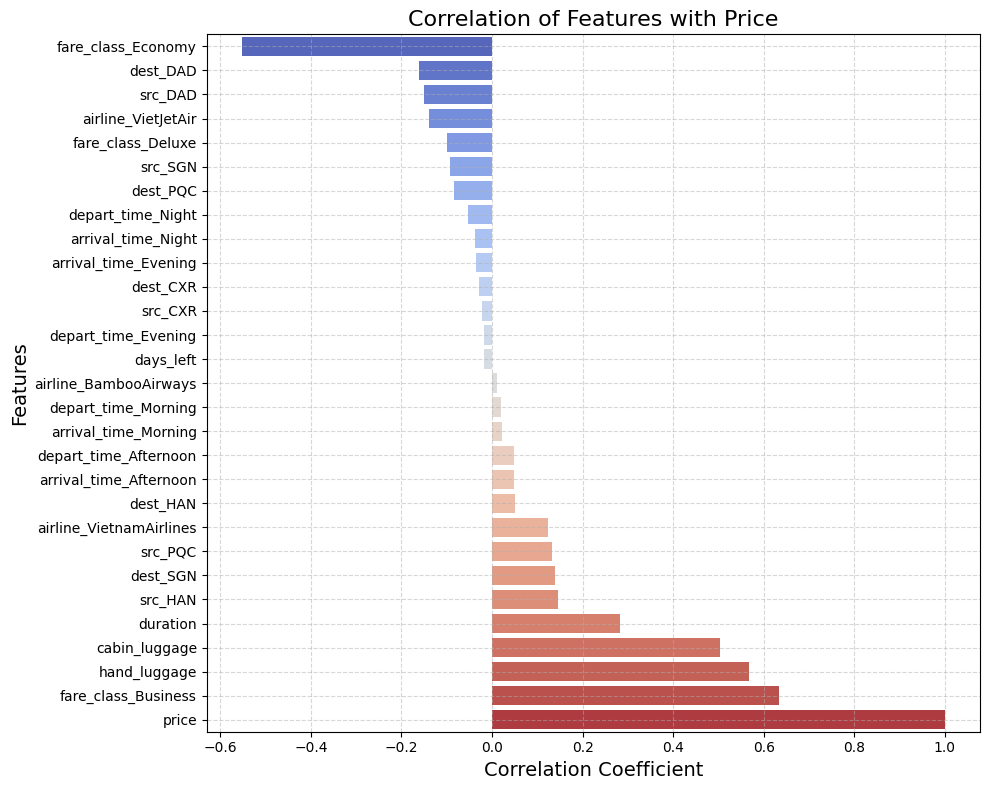

In [35]:
!pip install seaborn
import seaborn as sns

corr = flights_enc.corr()
charges_corr = corr['price'].sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x = charges_corr.values, y = charges_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', alpha=.5)
plt.tight_layout()
plt.show()